# *Clasificador Crudos - Fondos**

### PCA y LDA

## **Importe Librerias**


In [1]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
import openpyxl
import sklearn

#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#Librerias Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions

In [2]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.4.2


## **Tratamiento datos**

In [3]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)
print("#"*62)
print(dt_Supp_spect.dtypes)
print("#"*62)
dt_Supp_spect.head() #print dt frame

(59692, 41)
##############################################################
Molecules\Samples     object
CR1                  float64
CR2                  float64
CR3                  float64
CR4                  float64
CR5                  float64
CR6                  float64
CR7                  float64
CR8                  float64
CR9                  float64
CR10                 float64
CR11                 float64
CR12                 float64
CR13                 float64
CR14                 float64
CR15                 float64
CR16                 float64
CR17                 float64
CR18                 float64
CR19                 float64
CR20                 float64
CR21                 float64
VR1                  float64
VR2                  float64
VR3                  float64
VR4                  float64
VR5                  float64
VR6                  float64
VR7                  float64
VR8                  float64
VR9                  float64
VR10                 float

,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dt_Supp_spect = dt_Supp_spect.drop(['Molecules\Samples'], axis=1)
dt_Supp_spect.head()

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Target PCA - Clasificar como crudo 1 o fondo 0
y1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 

In [6]:
#Dt_Supp_spect - Transpuesta valuesTranspose Valt
valt=dt_Supp_spect.transpose() 
print(type(valt))
print(valt.shape)
valt.head()


<class 'pandas.core.frame.DataFrame'>
(40, 59692)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.500,31.574,52.324,23.838,65.693,47.620,49.053,64.986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,28.754,35.596,54.152,43.425,62.510,37.521,82.040,73.056,66.248,86.506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR3,11.208,18.767,30.508,27.087,40.397,15.232,51.565,30.627,45.974,74.695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.940,60.110,67.817,79.501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,2.360,10.718,25.710,43.697,37.720,29.929,56.975,26.378,83.384,80.180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#suma de la columna de los valores Transpuestos
valSum=valt.sum(axis=1)
valorSumados=valSum.values
print(valorSumados)
print(valorSumados.shape)


[1.25472100e+04 1.90225510e+04 8.98074600e+03 1.44428880e+04
 2.18918860e+04 1.63737530e+04 1.75341110e+04 1.83244430e+04
 1.83521630e+04 1.51162840e+04 1.71731940e+04 1.49102280e+04
 1.46795760e+04 1.21932250e+04 1.33428030e+04 1.33473720e+04
 1.39409160e+04 1.49871610e+04 1.30393250e+04 1.47125470e+04
 1.72299310e+04 1.59385229e+10 1.89512231e+10 1.44464857e+10
 8.49934500e+09 1.83994296e+10 1.39371284e+10 1.23794793e+10
 1.50232029e+10 1.12273875e+10 2.08628205e+10 1.16355489e+10
 1.06232867e+10 1.40481007e+10 1.11568083e+10 1.83979330e+10
 1.18917715e+10 1.34735674e+10 1.39156885e+10 1.47676267e+10]
(40,)


In [8]:
suma=valorSumados.reshape(40,1) #Reshape
print(suma.shape) 
valtn=valt/suma 

#Dt_Supp_spect - Transpuestos/SumaColumnas
valtn.head()

(40, 1)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,0.001285,0.002399,0.003068,0.002516,0.004170,0.001900,0.005236,0.003795,0.003909,0.005179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,0.001512,0.001871,0.002847,0.002283,0.003286,0.001972,0.004313,0.003840,0.003483,0.004548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR3,0.001248,0.002090,0.003397,0.003016,0.004498,0.001696,0.005742,0.003410,0.005119,0.008317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,0.001716,0.002551,0.003857,0.002864,0.004015,0.001895,0.005743,0.004162,0.004696,0.005505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,0.000108,0.000490,0.001174,0.001996,0.001723,0.001367,0.002603,0.001205,0.003809,0.003663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Creacion Modelo PCA 9 componentes
pca=PCA(n_components=2) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca)

(40, 2)
<class 'numpy.ndarray'>
[[ 2.09864599e-02  3.52848053e-03]
 [ 1.81128671e-02  4.57769736e-03]
 [ 3.20629670e-02 -4.88568669e-03]
 [ 2.25389797e-02 -3.31367608e-03]
 [ 1.06978872e-02 -1.22850028e-02]
 [ 1.70929779e-02  8.15686057e-03]
 [ 1.77293061e-02  2.39763108e-03]
 [ 1.51314776e-02 -7.27264240e-03]
 [ 1.82733134e-02  2.82287244e-03]
 [ 1.67859415e-02 -1.01106561e-02]
 [ 1.70008536e-02  2.62193550e-03]
 [ 2.34623830e-02  5.05441653e-03]
 [ 2.35343200e-02  4.76519639e-04]
 [ 2.97828460e-02 -2.53210434e-03]
 [ 1.40536914e-02 -1.14451295e-02]
 [ 2.36713768e-02  1.28070309e-02]
 [ 2.02157823e-02 -5.11141044e-03]
 [ 2.24429928e-02  8.72065420e-03]
 [ 1.89474551e-02 -1.15770925e-02]
 [ 2.45775100e-02  6.90139333e-03]
 [ 2.26699159e-02  3.95837660e-03]
 [-2.15427320e-02 -5.80173999e-05]
 [-2.15083756e-02 -5.20676622e-04]
 [-2.55275696e-02 -2.80016374e-03]
 [-2.36841977e-02  1.26352044e-02]
 [-2.21135368e-02  1.26908765e-03]
 [-2.06772452e-02 -4.31150061e-03]
 [-2.64521639e-02  6.98

In [10]:
#Split con x=Datos PCA
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(datos_pca, y1, train_size   = 0.7, random_state = 1234,shuffle = True) #Split valores PCA transformados
#Split con x= valores transpuesta/suma
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(valtn, y1, train_size   = 0.7, random_state = 1234,shuffle = True) #Split Valores No transformados

print(X_tr1.shape)
print(X_tr2.shape)

(28, 2)
(28, 59692)


## **Modelo** ML

In [67]:
SVC1 = SVC(C = 60, kernel = 'linear', random_state=123)
LDA = LinearDiscriminantAnalysis()

SVC1.fit(X_tr1, y_tr1)
LDA.fit(X_tr1, y_tr1)

#print(X_tr1.shape)
#print(y_tr1.shape)

LinearDiscriminantAnalysis()

In [69]:
# Predicciones test
# ==============================================================================
predicciones1 = SVC1.predict(X_te1)
#predicciones2 = modelo1.predict(X_te1)
prediccionesLDA = LDA.predict(X_te1)


print(predicciones1)
#print(predicciones2)
print(prediccionesLDA)

[1 0 1 1 1 0 1 1 1 0 1 1]
[1 0 1 1 1 0 1 1 1 0 1 1]


## **Metricas**

In [70]:
#Error medio absoluto
RMAE_SVC = np.sqrt(mean_absolute_error(predicciones1, y_te1))
RMAE_LDA = np.sqrt(mean_absolute_error(prediccionesLDA, y_te1))


print(RMAE_SVC)
print(RMAE_LDA)

0.0
0.0


In [72]:
# Accuracy de test del modelo 
# ==============================================================================
accuracySVC = accuracy_score(y_te1,predicciones1,normalize = True)
accuracyLDA = accuracy_score(y_te1,prediccionesLDA,normalize = True)

print("")
print(f"El accuracy del test SVC es: {100*accuracySVC}%")
print(f"El accuracy del test LDA es: {100*accuracyLDA}%")



El accuracy del test SVC es: 100.0%
El accuracy del test LDA es: 100.0%


## **Graficas**

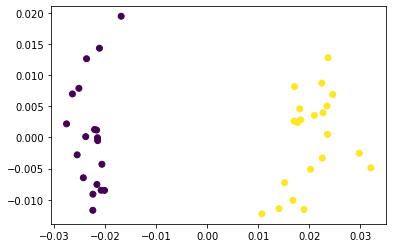

In [82]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos_pca[:, 0], datos_pca[:, 1], c=y1);

<AxesSubplot:>

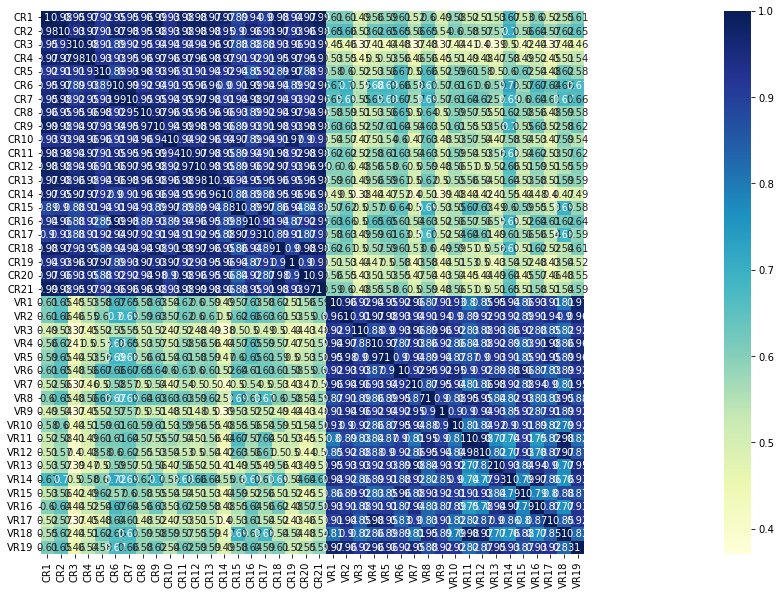

In [11]:
import seaborn as sns

plt.figure(figsize = (50,10))
sns.heatmap(dt_Supp_spect.corr(), square=True, annot=True, cmap="YlGnBu")